# Fashion MNIST Classification Using CNN

This project demonstrates how to build, train, and evaluate a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset.

The Fashion-MNIST dataset consists of 60,000 28x28 grayscale training images and 10,000 test images for 10 different categories, listed below:

0.  T-shirt
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot



## Table of Contents
- [Data Loading & Preprocessing](#data-loading--preprocessing)
- [Data Visualization](#data-visualization)
- [CNN Model Architecture](#cnn-model-architecture)
- [Training the Model](#training-the-model)
- [Evaluating the Model](#evaluating-the-model)
- [Loss & Accuracy Curves](#loss--accuracy-curves)

## Data Loading & Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [74]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y = y_test
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [75]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Training set: (48000, 28, 28, 1), (48000, 10)
Validation set: (12000, 28, 28, 1), (12000, 10)
Test set: (10000, 28, 28, 1), (10000, 10)


## Data Visualization


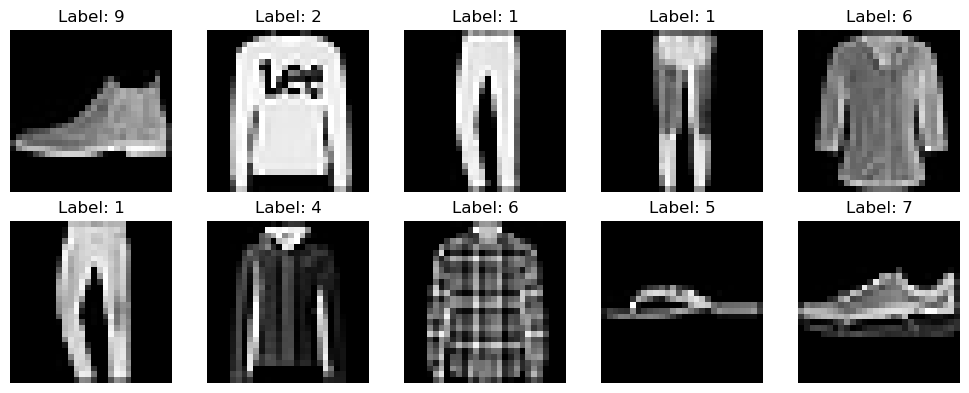

In [12]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## CNN Model Architecture
Simple CNN model with three convolutional layers, followed by max pooling layers, a flattening step, and two fully connected layers.

In [ ]:
model =  tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.6159 - loss: 1.0321 - val_accuracy: 0.8358 - val_loss: 0.4533
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8223 - loss: 0.4894 - val_accuracy: 0.8592 - val_loss: 0.3758
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.8530 - loss: 0.4157 - val_accuracy: 0.8806 - val_loss: 0.3229
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8637 - loss: 0.3796 - val_accuracy: 0.8840 - val_loss: 0.3154
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8769 - loss: 0.3434 - val_accuracy: 0.8853 - val_loss: 0.3040
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8801 - loss: 0.3276 - val_accuracy: 0.9007 - val_loss: 0.2735
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8892 - loss: 0.3072 - val_accuracy: 0.8999 - val_loss: 0.2699
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8911 - loss: 0.2968 - 

## Loss Curves

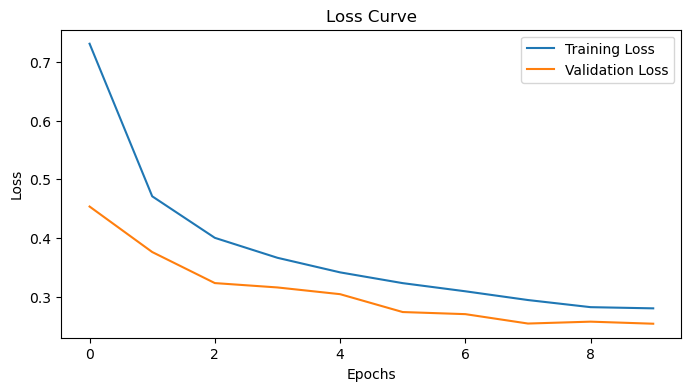

In [92]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


## Evaluating the Model

In [93]:
test_loss, test_acc = model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print(f"Test Accuracy : {test_acc:.4f}")
print(f'Accuracy: {accuracy_score(y_test_labels, y_pred_labels):.4f}')
print(f'Precision: {precision_score(y_test_labels, y_pred_labels, average="macro"):.4f}')
print(f'Recall: {recall_score(y_test_labels, y_pred_labels, average="macro"):.4f}')
print(f'F1 Score: {f1_score(y_test_labels, y_pred_labels, average="macro"):.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9017 - loss: 0.2732
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test Accuracy : 0.9010
Accuracy: 0.9010
Precision: 0.9010
Recall: 0.9010
F1 Score: 0.8986


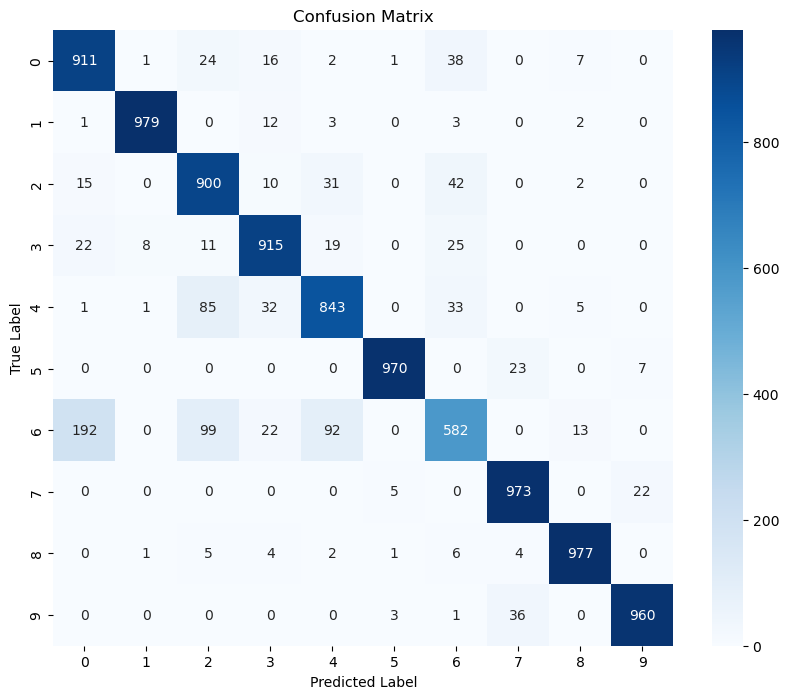

In [94]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()